In [ ]:
pip install langchain

In [ ]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.8 MB/s eta 0:00:00


In [ ]:
pip install langsmith

# Build A Basic Chatbot With Langgraph(GRAPH API)

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages #reduccer for message

In [ ]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)


In [ ]:
graph_builder

In [ ]:
pip install python-dotenv

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

False

API = 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

```
# This is formatted as code
```



In [ ]:
pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

meta-llama/llama-4-scout-17b-16e-instruct

In [ ]:
import os
from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"] = "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" # Replace with your actual API key

llm=ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

In [ ]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79d4a129f2d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79d4a10fa950>, model_name='meta-llama/llama-4-scout-17b-16e-instruct', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [ ]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()

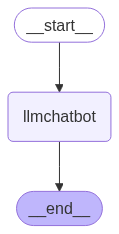

In [ ]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
response=graph.invoke({"messages":"Hi"})

In [ ]:
response["messages"][-1].content

"Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [ ]:
for event in graph.stream({"messages":"what is language model in simple language? give me answer in 2 line"}):
    for value in event.values():
        print(value["messages"][-1].content)

A language model is a computer program that understands and generates human-like language, like a conversational robot that can chat with you. 
It uses complex algorithms to predict and create text based on patterns and structures it has learned from a huge amount of data.


# Chatbot With Tool

In [ ]:
pip install langchain_tavily

In [ ]:
# Replace with your actual Tavily API key
os.environ["TAVILY_API_KEY"] = "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"

In [ ]:
from langchain_tavily import TavilySearch

tool=TavilySearch(max_results=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling c

In [ ]:
## Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [ ]:
tools=[tool,multiply]

In [ ]:
llm_with_tool=llm.bind_tools(tools)

In [ ]:
llm_with_tool

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79d4a129f2d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79d4a10fa950>, model_name='meta-llama/llama-4-scout-17b-16e-instruct', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'des

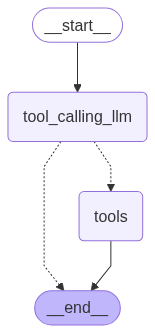

In [ ]:
#stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

##node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}
#graphs
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edge
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",tools_condition)
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response =graph.invoke({"messages":"what is the recent nividia stock news?"})

In [ ]:
response['messages'][-1].content

'{"query": "nvidia stock news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Financial Analysis for NVDA", "url": "https://finance.yahoo.com/quote/NVDA/", "content": "Stock: NVDA\\nFinancial Analysis:\\nLatest Open Price: 158.40 Latest Close Price: 157.79 Highest Close Price: 157.79 Lowest Close Price: 40.30 Average Close Price (2 years): 96.51 Standard Deviation of Close Price: 36.91 Volume Traded (2 years): 185389572630 Total Return (2 years): 273.24% Annualized Return (2 years): 93.19% CAGR (2 years): 93.19% Sharpe Ratio (2 years): 2.53 Max Drawdown (2 years): 0.59% ", "score": 0.98106, "raw_content": null}, {"url": "https://finance.yahoo.com/news/nvidia-stock-notches-fresh-record-high-in-remarkable-2025-turnaround-200401502.html", "title": "Nvidia stock notches fresh record high in remarkable 2025 ...", "content": "2.   News • 3 hours ago A crucial jobs report will arrive with the stock market at record high. Breaking News • 2 days ago S&P 500 t

In [ ]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the recent nividia stock news?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (zhbj3pgw9)
 Call ID: zhbj3pgw9
  Args:
    query: nvidia stock news
    search_depth: advanced
    time_range: week
    topic: finance
================================= Tool Message =================================
Name: tavily_search

{"query": "nvidia stock news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Financial Analysis for NVDA", "url": "https://finance.yahoo.com/quote/NVDA/", "content": "Stock: NVDA\nFinancial Analysis:\nLatest Open Price: 158.40 Latest Close Price: 157.79 Highest Close Price: 157.79 Lowest Close Price: 40.30 Average Close Price (2 years): 96.51 Standard Deviation of Close Price: 36.91 Volume Traded (2 years): 185389572630 Total Return (2 years): 273.24% Annualized Return (2 years): 93.19% CAGR

In [ ]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (84apnve5z)
 Call ID: 84apnve5z
  Args:
    query: recent ai news
    search_depth: advanced
    topic: news
  multiply (h34k60yqh)
 Call ID: h34k60yqh
  Args:
    a: 5
    b: 10
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.newsweek.com/nw-ai/ai-impact-awards-2025-science-engineering-2084754", "title": "AI Impact Awards 2025: The Changing Human Role in Science and Engineering - Newsweek", "score": 0.7318455, "published_date": "Wed, 25 Jun 2025 10:02:01 GMT", "content": "Newsweek _\\_will continue the conversation on meaningful AI innovations at our AI Impact Summit from Ju

# ReAct Agent Architecture

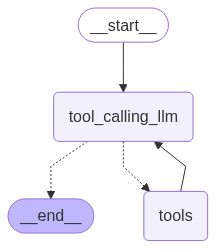

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (zf16rgvgb)
 Call ID: zf16rgvgb
  Args:
    query: recent ai news
    search_depth: advanced
    topic: news
  multiply (db77t5ywz)
 Call ID: db77t5ywz
  Args:
    a: 5
    b: 10
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.newsweek.com/nw-ai/ai-impact-awards-2025-science-engineering-2084754", "title": "AI Impact Awards 2025: The Changing Human Role in Science and Engineering - Newsweek", "score": 0.7318455, "published_date": "Wed, 25 Jun 2025 10:02:01 GMT", "content": "Newsweek _\\_will continue the conversation on meaningful AI innovations at our AI Impact Summit from Ju

# Adding memory in Agentic Graph

In [ ]:
response=graph.invoke({"messages":"Hello my name is Yuvraj"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello my name is Yuvraj
================================== Ai Message ==================================

Hello Yuvraj! It's nice to meet you. Is there something I can help you with or would you like to chat?


In [ ]:
response=graph.invoke({"messages":"What is my name"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is my name
================================== Ai Message ==================================

I don't have access to personal information such as names. I'm a large language model, I don't have the ability to store or retrieve personal data about individuals. If you'd like to share your name with me, I'd be happy to chat with you!


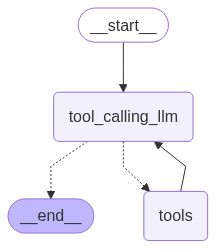

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory=MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config={"configurable":{"thread_id":"1"}}

response=graph.invoke({"messages":"Act as 3 years of experince as a data analyst "},config=config)

response

{'messages': [HumanMessage(content='Act as 3 years of experince as a data analyst ', additional_kwargs={}, response_metadata={}, id='2045ee48-ce5a-4e00-a7e3-e3f7ae22fe90'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'eqes4dbcz', 'function': {'arguments': '{"query":"data analyst with 3 years of experience","search_depth":"advanced","topic":"general"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 463, 'prompt_tokens': 1576, 'total_tokens': 2039, 'completion_time': 0.930286204, 'prompt_time': 0.042353011, 'queue_time': 0.049144006, 'total_time': 0.972639215}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--88ef9ef6-c5fe-4f25-b986-24455d5674a7-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'data analyst with 3 years of experience', 'search_depth': 'advanced', 'topic': 'general'}, 'id': 'e

In [ ]:
response['messages'][-1].content

'As a data analyst with 3 years of experience, you likely have a strong foundation in data analysis, programming languages, and statistical knowledge. Your experience has probably equipped you with skills in data visualization, data mining, and data interpretation. You may have worked with various tools and technologies, such as Excel, SQL, Python, or R, and have a good understanding of data modeling, data warehousing, and data governance.\n\nSome potential responsibilities and tasks you may have handled in your role include:\n\n1. Data cleaning and preprocessing\n2. Data visualization and reporting\n3. Statistical analysis and modeling\n4. Data mining and insights generation\n5. Collaborating with stakeholders to understand business needs and develop solutions\n\nKeep in mind that specific responsibilities and requirements may vary depending on the organization, industry, and specific job role. \n\nIf you have any specific questions or need further information, feel free to ask!'

In [ ]:
response=graph.invoke({"messages":"As a data analyst which skills is must required can you give me answer in short way"},config=config)

print(response['messages'][-1].content)

Key skills required for a data analyst:

1. SQL knowledge
2. Data visualization
3. Statistical analysis
4. Data management
5. Data collection
6. Data storytelling
7. Programming languages (Python, R, etc.)
8. Data modeling
9. Data governance
10. Data cleansing

These skills can vary depending on the organization and industry.


In [ ]:
response=graph.invoke({"messages":"What is Statistical Analysis"},config=config)

print(response['messages'][-1].content)

Statistical analysis is the process of collecting, organizing, and interpreting data to extract meaningful insights and patterns. It involves using statistical methods and techniques to:

1. **Summarize data**: Describe the basic features of the data, such as mean, median, mode, and standard deviation.
2. **Identify patterns**: Discover relationships between variables, trends, and correlations.
3. **Make inferences**: Draw conclusions about a population based on a sample of data.
4. **Test hypotheses**: Verify or reject assumptions about the data.

Common statistical analysis techniques include:

1. Descriptive statistics (mean, median, mode)
2. Inferential statistics (hypothesis testing, confidence intervals)
3. Regression analysis (predicting outcomes)
4. Time series analysis (analyzing trends over time)
5. Correlation analysis (identifying relationships)

Statistical analysis is used in various fields, including business, economics, medicine, social sciences, and more. As a data ana

# **Streaming**

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [ ]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

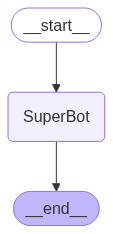

In [ ]:
graph = StateGraph(State)

#node
graph.add_node('SuperBot', superbot)

#Edge
graph.add_edge(START, 'SuperBot')
graph.add_edge('SuperBot', END)

#compile
graph_builder = graph.compile(checkpointer=memory)

#Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Yuvraj And I like Batman"},config)

{'messages': [HumanMessage(content='Hi,My name is Yuvraj And I like Batman', additional_kwargs={}, response_metadata={}, id='83d93218-5fbf-4ece-960d-90c28955127c'),
  AIMessage(content="Nice to meet you, Yuvraj! Batman is an awesome superhero! Who's your favorite Batman actor - Christian Bale, Ben Affleck, or maybe Michael Keaton? Or do you prefer the animated series or comics? Let's chat about all things Batman!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 22, 'total_tokens': 75, 'completion_time': 0.113658994, 'prompt_time': 0.002616651, 'queue_time': 0.092829804, 'total_time': 0.116275645}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_37da608fc1', 'finish_reason': 'stop', 'logprobs': None}, id='run--5347f1a0-c3be-4c5c-b5c4-52adb5c6fb32-0', usage_metadata={'input_tokens': 22, 'output_tokens': 53, 'total_tokens': 75})]}

# **Streaming**
Methods: .stream() and astream()

* These methods are sync and async methods for streaming back results.
Additional parameters in streaming modes for graph state

* **values** : This streams the full state of the graph after each node is called.
* **updates** : This streams updates to the state of the graph after each node is called.

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Yuvraj And I like Batman"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Yuvraj And I like Batman', additional_kwargs={}, response_metadata={}, id='7b4a6271-6583-453f-8d18-8438e459e3c7'), AIMessage(content="Hi Yuvraj! Nice to meet you! Batman is an awesome superhero! Who's your favorite Batman actor - Christian Bale, Ben Affleck, or maybe Michael Keaton? Do you have a favorite Batman gadget or vehicle?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 22, 'total_tokens': 69, 'completion_time': 0.112940059, 'prompt_time': 0.002834729, 'queue_time': 0.232238372, 'total_time': 0.115774788}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'finish_reason': 'stop', 'logprobs': None}, id='run--01208dd2-a826-480c-bd8a-1e9ea398b28e-0', usage_metadata={'input_tokens': 22, 'output_tokens': 47, 'total_tokens': 69}), HumanMessage(content='Hi,My name is Yuvraj And I like Batman', additional_kwargs={}, response_metadata={},

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Yuvraj And I like Batman"},config,stream_mode="updates"):
    print(chunk)


{'SuperBot': {'messages': [AIMessage(content="I think we're on Batman-repeat mode, Yuvraj! Don't get me wrong, it's awesome that you're passionate about the Caped Crusader! Let's try to switch gears a bit. How about we talk about your favorite hobbies or interests outside of Batman? What do you enjoy doing in your free time?\n\n(But if you want to keep chatting about Batman, I'm here for it too!)", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 697, 'total_tokens': 776, 'completion_time': 0.157203945, 'prompt_time': 0.020813474, 'queue_time': 0.049902821, 'total_time': 0.178017419}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'finish_reason': 'stop', 'logprobs': None}, id='run--bead0bee-7375-48b1-9216-e82a0fe2db16-0', usage_metadata={'input_tokens': 697, 'output_tokens': 79, 'total_tokens': 776})]}}


In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Yuvraj And I like Batman"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Nice to meet you, Yuvraj! Batman is an awesome superhero! Who's your favorite Batman actor - Christian Bale, Ben Affleck, or maybe Michael Keaton? Do you have a favorite Batman villain or gadget? Let's chat about all things Batman!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 22, 'total_tokens': 75, 'completion_time': 0.106237082, 'prompt_time': 0.00284457, 'queue_time': 0.15845288200000002, 'total_time': 0.109081652}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'finish_reason': 'stop', 'logprobs': None}, id='run--836650d2-dffd-41e1-ac00-dc29a72c97e6-0', usage_metadata={'input_tokens': 22, 'output_tokens': 53, 'total_tokens': 75})]}}


In [ ]:
for chunk in graph_builder.stream({'messages':"I like Ben Affleck "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='Ben Affleck is a talented actor, and his portrayal of Batman was well-received by many fans. He brought a sense of grit and intensity to the character, which fit well with the DC Extended Universe.\n\nAs a fan of Ben Affleck\'s Batman, you might enjoy some of the other movies and TV shows he\'s been in, such as "Good Will Hunting", "The Town", and "Daredevil". He\'s a versatile actor who can play a wide range of roles.\n\nNow, let\'s talk more about Batman! What do you think makes him such an enduring and iconic character? Is it his gadgets, his martial arts skills, or something else entirely?\n\n(By the way, do you have a favorite Batman ally, like Robin or Commissioner Gordon?)', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 203, 'total_tokens': 356, 'completion_time': 0.302045876, 'prompt_time': 0.006894223, 'queue_time': 0.047212227, 'total_time': 0.308940099}, 'model_name': 'meta-ll

In [ ]:
config = {"configurable": {"thread_id": "5"}}

async for event in graph_builder.astream_events({"messages":["Hi my name is yuvraj and i like batman"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi my name is yuvraj and i like batman']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'b2f8132b-5c31-4cfc-87ab-3f717e1c31c7', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi my name is yuvraj and i like joker', additional_kwargs={}, response_metadata={}, id='bb901ce7-bdb8-4620-b490-b44f5d088ca5'), AIMessage(content="Nice to meet you, Yuvraj!\n\nSo, you like the Joker, huh? That's a fascinating character! He's such an iconic villain with a complex personality. What is it about the Joker that resonates with you? Is it his unpredictability, his chaotic nature, or something else entirely?\n\n(By the way, are you a fan of the DC Comics universe or a particular movie/TV show featuring the Joker, like the Batman series or the Joker movie with Joaquin Phoenix?)", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'meta

# Human in the loop